# **A Simple Text Generation**

**Task** 

**1-** Given a corpus of text, the model will attempt to understand the patterns of words within it.

**2-** Given a new piece of text called a ***seed***, predict what word should come next. 

**3-** Once it has that, **the seed and the predicted word become the new seed**, and the next word can be predicted. 

$\Rightarrow$ Thus, when trained on a corpus of text, a neural network can attempt to write new text in a similar style.

**Using a small amount of text** to illustrate how to **build up to a predictive model** $\rightarrow$ creating **a full model with a lot more text**.

When it comes to creating data that can be used for training a predictive model, there’s an additional step where the ***sequences need to be transformed into input sequences and labels***, where ***the input sequence is a group of words*** and ***the label is the next word in the sentence***.

Then **train** a model **to match the input sequences to their labels** $\rightarrow$ future predictions can pick **a label that’s close to the input sequence**.

### **Turning Sequences into Input Sequences**

**Predicting text** $\Leftrightarrow$ Matching sequences to labels $\Leftrightarrow$ **Train** a neural network **with an input sequence (feature)** that **has an associated label**.

For example, **`Today has a beautiful blue sky`** 

$\rightarrow$ Split this into **`Today has a beautiful blue`** as the **feature** and **`sky`** as the **label**. 

$\rightarrow$ Then, if getting  a prediction for the text **`Today has a beautiful blue`** $\rightarrow$ it would likely be **`sky`**. 

Given lots of sentences, training on sequences of words with the next word being the label $\rightarrow$ build up a predictive model where **the most likely next word in the sentence can be predicted from an existing body of text**.

Create a single string with all the text, and set that to be the data. 

Use **\n** for the line breaks $\rightarrow$ corpus can be easily loaded and tokenized:

In [10]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import seaborn as sns

# Remove the HTML tags
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
import json

# Take the stopwords
import spacy
import string 
import re

en = spacy.load("en_core_web_lg")
stopwords = en.Defaults.stop_words

In [41]:
tokenizer = Tokenizer()

data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \n His father died and made him a man again \n Left him a farm and ten acres of ground. \n He gave a grand party for friends and relations \n Who didnt forget him when come to the wall, \n And if youll but listen Ill make your eyes glisten \n Of the rows and the ructions of Lanigans Ball. \n Myself to be sure got free invitation, \n For all the nice  girls and boys I might ask, \n And just in a minute both friends and relations \n Were dancing round merry as bees round a cask. \n Judy ODaly, that nice little milliner, \n She tipped me a wink for to give her a call, \n And I soon arrived with Peggy McGilligan \n Just in time for Lanigans Ball. \n There were lashings of punch and wine for the ladies, \n Potatoes and cakes; there was bacon and tea, \n There were the Nolans, Dolans, OGradys"

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [42]:
tokenizer.texts_to_sequences(corpus)

[[6, 3, 20, 4, 21, 22, 23, 24],
 [25, 26, 27, 11, 28, 2, 29],
 [30, 31, 32, 1, 33, 7, 2, 34, 35],
 [36, 7, 2, 37, 1, 38, 39, 4, 40],
 [11, 41, 2, 42, 43, 5, 12, 1, 13],
 [44, 45, 46, 7, 47, 48, 8, 3, 49],
 [1, 50, 51, 52, 53, 54, 55, 56, 57, 58],
 [4, 3, 59, 1, 3, 60, 4, 14, 15],
 [61, 8, 62, 63, 64, 65, 66],
 [5, 67, 3, 16, 68, 1, 69, 17, 70, 71],
 [1, 18, 6, 2, 72, 73, 12, 1, 13],
 [9, 74, 19, 75, 76, 77, 19, 2, 78],
 [79, 80, 81, 16, 82, 83],
 [84, 85, 86, 2, 87, 5, 8, 88, 89, 2, 90],
 [1, 17, 91, 92, 93, 94, 95],
 [18, 6, 96, 5, 14, 15],
 [10, 9, 97, 4, 98, 1, 99, 5, 3, 100],
 [101, 1, 102, 10, 103, 104, 1, 105],
 [10, 9, 3, 106, 107, 108]]

**Splitting** the sentence into **multiple smaller sequences**

In [13]:
input_sequences = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)

input_sequences[:len(corpus[0].split()) - 1]

[[6, 3],
 [6, 3, 20],
 [6, 3, 20, 4],
 [6, 3, 20, 4, 21],
 [6, 3, 20, 4, 21, 22],
 [6, 3, 20, 4, 21, 22, 23],
 [6, 3, 20, 4, 21, 22, 23, 24]]

**Find the longest sentence** in the input sequences and **pre-pad everything to that length**

In [14]:
max_sequence_len = max([len(x) for x in input_sequences])

input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

input_sequences[:len(corpus[0].split()) - 1]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  3],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  6,  3, 20],
       [ 0,  0,  0,  0,  0,  0,  0,  6,  3, 20,  4],
       [ 0,  0,  0,  0,  0,  0,  6,  3, 20,  4, 21],
       [ 0,  0,  0,  0,  0,  6,  3, 20,  4, 21, 22],
       [ 0,  0,  0,  0,  6,  3, 20,  4, 21, 22, 23],
       [ 0,  0,  0,  6,  3, 20,  4, 21, 22, 23, 24]])

**Split** a set of padded input sequences into **features and labels**, where **the label** is simply **the last token** in the input sequence

<center>

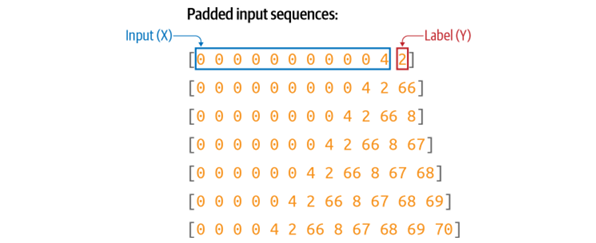

<em>Turning the padded sequences into features (x) and labels (y)</em>

</center>

In [15]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

for i in range(0, len(corpus[0].split()) - 1):
    print(f'Feature: {xs[i]} - Label: {labels[i]}')


Feature: [0 0 0 0 0 0 0 0 0 6] - Label: 3
Feature: [0 0 0 0 0 0 0 0 6 3] - Label: 20
Feature: [ 0  0  0  0  0  0  0  6  3 20] - Label: 4
Feature: [ 0  0  0  0  0  0  6  3 20  4] - Label: 21
Feature: [ 0  0  0  0  0  6  3 20  4 21] - Label: 22
Feature: [ 0  0  0  0  6  3 20  4 21 22] - Label: 23
Feature: [ 0  0  0  6  3 20  4 21 22 23] - Label: 24


**Encode the labels** into a set of $Ys$ that can then use to train $\rightarrow$ **need to one-hot encode the labels** $\rightarrow$ match the desired output from a neural network.

The labels are just tokens but if use these in a classifier $\rightarrow$ have to be mapped to an output neuron. 

$\Rightarrow$ If classifying **`n`** words, with **each word being a class** $\rightarrow$ need to have **`n`** neurons. 

$\Rightarrow$ Have to **control the size of the vocabulary** *[The more words we have, the more classes we'll need]*.

In this case, if **predict** up to **`10,000 vocabulary words`** $\rightarrow$ need an output layer with **`10,000 neurons`**!

$\Rightarrow$ **Very sparse representation** - If having **a lot of training data** and **a lot of potential words** $\rightarrow$ eat memory very quickly! 

Suppose, **100000 training sentences** with **a vocabulary of 10000 words** $\rightarrow$ need **1000000000 bytes** just to hold the labels! 

But it’s the way to design the network for classifying and predicting words.

In [16]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

print(f'Label: {labels[5]}')
print(f'Y: {ys[5]}')

Label: 23
Y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### **Creating the Model**

The model consist of just an **Embedding layer** $\rightarrow$ **LSTM** $\rightarrow$ **Dense layer**

- **The embedding** needs one vector per word $\rightarrow$ **the parameters** will be **the total number of words** multiply by **the number of dimensions** embed on.

- **The LSTM bidirectional** has the number of steps that is the max length of a sequence minus 1 (note: *padding*) *(because took one token off the end to make the label)*.

- **The dense layer** with **the total number of words as a parameter**, activated by **softmax**. Each neuron in this layer will be the probability that the next word matches the word for that index value

In [17]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(total_words, 8))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_sequence_len - 1)))
model.add(tf.keras.layers.Dense(total_words, activation=tf.nn.softmax))

Compile with *a categorical loss function* such as **`categorical cross entropy`** and *an optimizer* like **`Adam`**

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [19]:
history = model.fit(xs, ys, epochs=1500, verbose=1)

Epoch 1/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - acc: 0.0377 - loss: 4.6904
Epoch 2/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.0655 - loss: 4.6867 
Epoch 3/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.0598 - loss: 4.6840 
Epoch 4/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.0707 - loss: 4.6801
Epoch 5/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.0507 - loss: 4.6756
Epoch 6/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.0607 - loss: 4.6735
Epoch 7/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.0512 - loss: 4.6655
Epoch 8/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.0538 - loss: 4.6600
Epoch 9/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.0590 - loss: 4.6482
Epoch 10/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.0855 - loss: 4.6283
Epoch 11/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.0546 - loss: 4.6207 
Epoch 12/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.0377 - loss: 4.6071     
Epoch 13/1500
5/5 ━━━━━━━━━━━━━━

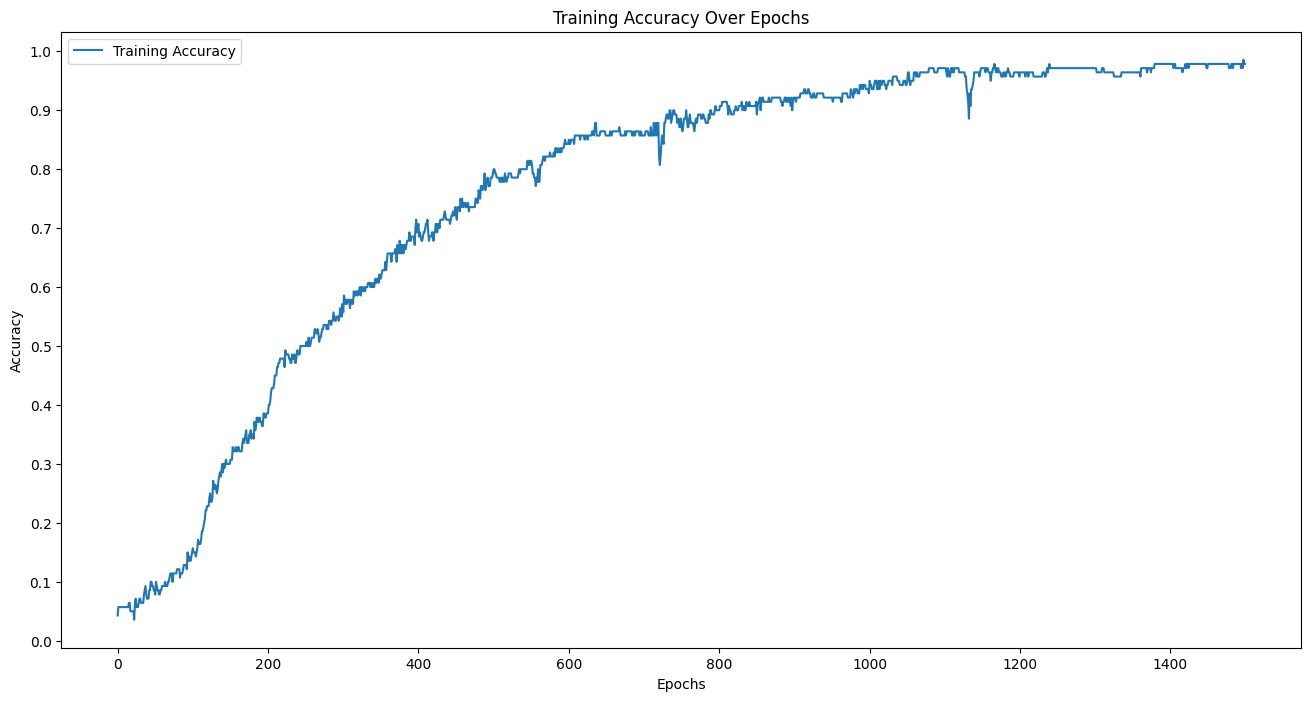

In [20]:
# Extract history
result = history.history

# Define epochs and accuracy data
epochs = [i for i in range(len(result['acc']))]  
acc = result['acc']

# Plot accuracy and validation accuracy
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=acc, label='Training Accuracy')  

# Add labels and legend
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.yticks(np.arange(0, 1.0001, 0.1))
plt.title('Training Accuracy Over Epochs')
plt.legend()

# Show plot
plt.show()

The model at around **95% accuracy** $\rightarrow$ if having a string of text that it has already seen, it will **predict the next word accurately about 95% of the time**. 

**Note** - When generating text it will continually see words that **it hasn’t previously seen**, so despite this good number, the network will rapidly **end up producing nonsensical text**.

### **Generating Text**

***The next step is to give it a sequence of text and have it predict the next word***.

### **Predicting the Next Word**

Start by creating a phrase called the **`seed text`**. This is **the initial expression** on which the network will base **all the content** it generates. It will do this by predicting the next word.

In [21]:
seed_text = 'in the town of athy'

Tokenize this using **`texts_to_sequences`** $\rightarrow$ returns an array, even if there’s only one value so take the first element in that array

In [27]:
token_list = tokenizer.texts_to_sequences([seed_text])[0]

token_list

[6, 3, 20, 4, 21]

Pad that sequence to get it into the same shape as the data used for training

In [28]:
token_list = np.array(pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre'))

token_list

array([[ 0,  0,  0,  0,  0,  6,  3, 20,  4, 21]])

Predict the next word for this token list by calling **`model.predict`** on the token list. 

This will return the probabilities for each word in the corpus, so pass the results to **np.argmax** to get the most likely one

In [29]:
model.predict(token_list)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


array([[1.80246829e-07, 8.36963227e-05, 3.85460595e-07, 1.81842639e-04,
        2.22826819e-03, 3.78506957e-05, 6.79092199e-12, 7.44757589e-09,
        9.64778446e-05, 1.54847637e-08, 1.87559381e-05, 2.71692197e-10,
        4.35984839e-06, 1.75470141e-05, 3.13832902e-06, 1.09502673e-06,
        2.50980247e-05, 8.05022353e-07, 7.78446065e-07, 5.44599699e-10,
        2.74867875e-06, 2.18979563e-04, 9.54618633e-01, 5.31674223e-03,
        5.40211950e-05, 1.95980832e-07, 1.04251975e-10, 9.37847647e-11,
        6.23334717e-10, 1.88475167e-06, 1.94853328e-07, 7.32619301e-05,
        1.47422033e-05, 4.86778335e-05, 5.59127614e-07, 5.43270202e-04,
        1.36762921e-07, 1.62226304e-08, 2.29840371e-04, 5.24667790e-04,
        6.79399363e-06, 6.47471779e-06, 6.92012136e-08, 4.24579483e-08,
        1.93755398e-07, 4.13862189e-08, 4.74996670e-13, 6.11286282e-07,
        9.61674562e-09, 1.21144389e-04, 7.53145002e-07, 2.80047430e-09,
        5.43555325e-06, 4.69682831e-03, 2.14798529e-05, 3.706977

In [30]:
predicted = np.argmax(model.predict(token_list), axis=-1)
print(predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[22]


Look it up by **searching through the word index items** until you find <code>predicted</code> and printing it out:

In [31]:
for word, index in tokenizer.word_index.items():
    if index == predicted:
        print(word)
        break

one


$\Rightarrow$ Starting from the text **`in the town of athy`**, the network predicted the next word should be **`one`**—which if **look at the training data is correct**, because the song begins with the line:

<center>

***In the town of Athy one Jeremy Lanigan***

***Battered away til he hadnt a pound***

</center> 

### **Compounding Predictions to Generate Text**

To have the neural network **create new text** $\rightarrow$ **repeat the prediction**, **adding new words** each time.

Used the phrase ***sweet jeremy saw dublin*** $\rightarrow$ predict ***then*** $\rightarrow$ append ***then*** to the seed text to get ***sweet jeremy saw dublin then*** $\rightarrow$ get another prediction $\rightarrow$ repeating this process will give an AI-created string of text.

In [32]:
seed_text = 'sweet jeremy saw dublin'
next_word = 10

for _ in range(next_word):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = np.array(pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre'))
    predicted = np.argmax(model.predict(token_list, verbose=0))
    output_word = ""
    
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    
    seed_text += " " + output_word

print(seed_text)

sweet jeremy saw dublin to for the ructions of lanigans ball bacon forget in


**Rapidly descends into gibberish. Why?**
1.  The body of training text is **really small** $\rightarrow$ has very little context to work with.
2. The prediction of the next word in the sequence **depends on the previous words in the sequence** $\Rightarrow$ if there is **a poor match on the previous ones**, even **the best next match** will have **a low probability** $\Rightarrow$ **add** this to the sequence and **predict the next word** after that, **the likelihood of it having a low probability is even higher** $\Rightarrow$ the predicted words will seem **semirandom**.

$\Rightarrow$ The phenomenon of AI-generated content **getting increasingly nonsensical over time**.

### **Extending the Dataset**

**1700 lines** of text gathered from **a number of songs**.

In [53]:
data = open('./tmp/irish-lyrics-eof.txt').read()
corpus = data.lower().split('\n')

corpus

['come all ye maidens young and fair',
 'and you that are blooming in your prime',
 'always beware and keep your garden fair',
 'let no man steal away your thyme',
 'for thyme it is a precious thing',
 'and thyme brings all things to my mind',
 'nlyme with all its flavours, along with all its joys',
 'thyme, brings all things to my mind',
 'once i and a bunch of thyme',
 'i thought it never would decay',
 'then came a lusty sailor',
 'who chanced to pass my way',
 'and stole my bunch of thyme away',
 'the sailor gave to me a rose',
 'a rose that never would decay',
 'he gave it to me to keep me reminded',
 'of when he stole my thyme away',
 'sleep, my child, and peace attend thee',
 'all through the night',
 'guardian angels god will send thee',
 'soft the drowsy hours are creeping',
 'hill and dale in slumber sleeping',
 'i my loving vigil keeping',
 'while the moon her watch is keeping',
 'while the weary world is sleeping',
 'oer thy spirit gently stealing',
 'visions of delight rev

In [54]:
tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1

total_words

2690

In [55]:
tokenizer.texts_to_sequences(corpus)

[[51, 12, 99, 1247, 48, 2, 70],
 [2, 11, 15, 31, 368, 8, 24, 1248],
 [277, 834, 2, 215, 24, 588, 70],
 [121, 35, 110, 835, 55, 24, 193],
 [10, 193, 25, 23, 5, 589, 462],
 [2, 193, 836, 12, 837, 4, 7, 242],
 [1249, 17, 12, 75, 1250, 243, 17, 12, 75, 838],
 [193, 836, 12, 837, 4, 7, 242],
 [154, 3, 2, 5, 839, 6, 193],
 [3, 369, 25, 49, 84, 463],
 [52, 111, 5, 1251, 840],
 [103, 841, 4, 842, 7, 172],
 [2, 316, 7, 839, 6, 193, 55],
 [1, 840, 131, 4, 9, 5, 105],
 [5, 105, 15, 49, 84, 463],
 [32, 131, 25, 4, 9, 4, 215, 9, 1252],
 [6, 21, 32, 316, 7, 193, 55],
 [464, 7, 590, 2, 370, 1253, 145],
 [12, 89, 1, 66],
 [1254, 843, 317, 26, 844, 145],
 [371, 1, 845, 465, 31, 1255],
 [318, 2, 1256, 8, 591, 592],
 [3, 7, 466, 1257, 846],
 [112, 1, 173, 18, 593, 23, 846],
 [112, 1, 467, 155, 23, 592],
 [94, 194, 847, 594, 848],
 [1258, 6, 156, 1259],
 [1260, 5, 372, 2, 1261, 849],
 [278, 3, 850, 5, 595, 319],
 [7, 74, 373, 122, 596, 195, 146],
 [216, 48, 374, 375, 23, 85],
 [376, 7, 1262, 6, 22, 122, 1

In [60]:
input_sequences = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

input_sequences[:len(tokenizer.texts_to_sequences([corpus[0]])[0]) - 1]

[[51, 12],
 [51, 12, 99],
 [51, 12, 99, 1247],
 [51, 12, 99, 1247, 48],
 [51, 12, 99, 1247, 48, 2],
 [51, 12, 99, 1247, 48, 2, 70]]

In [63]:
max_sequence_len = max([len(x) for x in input_sequences])

input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

input_sequences[:len(tokenizer.texts_to_sequences([corpus[0]])[0]) - 1]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,   51,   12],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   51,   12,   99],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,   51,   12,   99, 1247],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          51,   12,   99, 1247,   48],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   51,
          12,   99, 1247,   48,    2],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   51,   12,
          99, 1247,   48,    2,   70]])

In [64]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

for i in range(0, len(tokenizer.texts_to_sequences([corpus[0]])[0]) - 1):
    print(f'Feature: {xs[i]} - Label: {labels[i]}')

Feature: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 51] - Label: 12
Feature: [ 0  0  0  0  0  0  0  0  0  0  0  0  0 51 12] - Label: 99
Feature: [ 0  0  0  0  0  0  0  0  0  0  0  0 51 12 99] - Label: 1247
Feature: [   0    0    0    0    0    0    0    0    0    0    0   51   12   99
 1247] - Label: 48
Feature: [   0    0    0    0    0    0    0    0    0    0   51   12   99 1247
   48] - Label: 2
Feature: [   0    0    0    0    0    0    0    0    0   51   12   99 1247   48
    2] - Label: 70


In [65]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

print(f'Label: {labels[5]}')
print(f'Y: {ys[5]}')

Label: 70
Y: [0. 0. 0. ... 0. 0. 0.]


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(total_words, 8))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_sequence_len - 1)))
model.add(tf.keras.layers.Dense(total_words, activation=tf.nn.softmax))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(xs, ys, epochs=1500, verbose=1)

Epoch 1/1500
377/377 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.0577 - loss: 7.1849
Epoch 2/1500
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.0656 - loss: 6.4036
Epoch 3/1500
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.0686 - loss: 6.2608
Epoch 4/1500
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.0686 - loss: 6.2249
Epoch 5/1500
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.0647 - loss: 6.1492
Epoch 6/1500
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.0635 - loss: 6.1743
Epoch 7/1500
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.0712 - loss: 6.0522
Epoch 8/1500
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.0734 - loss: 5.9626
Epoch 9/1500
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.0685 - loss: 5.9318
Epoch 10/1500
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.0727 - loss: 5.8670
Epoch 11/1500
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.0781 - loss: 5.8365
Epoch 12/1500
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.0763 - loss: 5.7770
E

**About 60% accuracy, with the curve flattening out** when this model for **1500 epochs**

In [ ]:
# Extract history
result = history.history

# Define epochs and accuracy data
epochs = [i for i in range(len(result['acc']))]  
acc = result['acc']

# Plot accuracy and validation accuracy
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=acc, label='Training Accuracy')  

# Add labels and legend
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training Accuracy Over Epochs')
plt.legend()

# Show plot
plt.show()

### **Changing the Model Architecture**

**Improving the model** by **changing its architecture**, using multiple stacked LSTMs

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(total_words, 8))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_sequence_len-1, return_sequences='True')))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_sequence_len-1)))
model.add(tf.keras.layers.Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(xs, ys, epochs=1000, verbose=1)

It’s **not significantly different** from the previous curve

In [ ]:
# Extract history
result = history.history

# Define epochs and accuracy data
epochs = [i for i in range(len(result['accuracy']))]  
acc = result['accuracy']

# Plot accuracy and validation accuracy
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=acc, label='Training Accuracy')  

# Add labels and legend
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training Accuracy Over Epochs')
plt.legend()

# Show plot
plt.show()

### **Improving the Data**

**`TRICK`**: Extend the size of this dataset without adding any new songs, called ***windowing*** the data.

Every line in every song is read as a single line and then turned into input sequences. While humans read songs line by line in order to hear rhyme and meter, the model doesn’t have to, in particular when using ***bidirectional LSTMs***.

$\Rightarrow$ Instead of taking the line **`In the town of Athy, one Jeremy Lanigan`** processing that, and then moving to the next line **`Battered away till he hadn’t a pound`** and processing that $\rightarrow$ now treat all the lines as one long, continuous text. 

$\rightarrow$ Create a ***“window”*** into that text of `n` words, process that and then **move the window forward one word to get the next input sequence**.

In this case, **training data** can be **yielded** in the form of **an increased number of input sequences** $\rightarrow$ Moving the window across the entire corpus of text would give ***((number_of_words – window_size) × window_size)*** input sequences.

In [ ]:
window_size = 10
sentences = []
all_text = []

data = open('./tmp/irish-lyrics-eof.txt').read()
corpus = data.lower()
words = re.split(r'[ \n]+', corpus)

words

In [ ]:
range_size = len(words) - window_size + 1

for i in range(0, range_size):
    this_sentence=""
    this_sentence = this_sentence + words[i : i + window_size + 1] + " "
    sentences.append(this_sentence)

In [ ]:
sentences[-1]

In [ ]:
tokenizer.fit_on_texts(sentences)

total_words = len(tokenizer.word_index) + 1

total_words

In [ ]:
input_sequences = []

for line in sentences:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

input_sequences[:len(tokenizer.texts_to_sequences([sentences[0]])[0]) - 1]

In [ ]:
input_sequences = np.array(pad_sequences(input_sequences, maxlen=window_size, padding='pre'))

input_sequences[:len(tokenizer.texts_to_sequences([sentences[0]])[0]) - 1]

In [ ]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

for i in range(0, 6):
    print(f'Feature: {xs[i]} - Label: {labels[i]}')

In [ ]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

print(f'Label: {labels[5]}')
print(f'Y: {ys[5]}')

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(total_words, 8))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_sequence_len-1, return_sequences='True')))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_sequence_len-1)))
model.add(tf.keras.layers.Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(xs, ys, epochs=1000, verbose=1)

In [ ]:
# Extract history
result = history.history

# Define epochs and accuracy data
epochs = [i for i in range(len(result['accuracy']))]  
acc = result['accuracy']

# Plot accuracy and validation accuracy
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=acc, label='Training Accuracy')  

# Add labels and legend
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training Accuracy Over Epochs')
plt.legend()

# Show plot
plt.show()

**No longer have sentences and creating sequences the same size as the moving window**, <code>window_size</code> is the size of the window. 

The full file is read $\rightarrow$ converted to lowercase $\rightarrow$ split into an array of words using string splitting $\rightarrow$ loops through the **`words`** and makes sentences of each word **from the current index up to the current index plus the window size** $\rightarrow$ adding each of those newly constructed sentences to the sentences array.


**There are many hyperparameters you can try tuning**. 
1. **Change the window size will change the amount of training data**—a **smaller window** size can yield **more data**, but there will be **fewer words to give to a label** $\Rightarrow$ set it **too small** will end up with **nonsensical** poetry. 
2. **Change the dimensions in the embedding**
3. **The number of LSTMs**
4. **The size of the vocab to use for training** 

**The percentage accuracy isn’t the best measurement** $\rightarrow$ need to make **a more subjective examination** of how much sense the poetry makes $\Rightarrow$ **no hard-and-fast rule** to follow to determine whether your model is good or not.


### **Character-Based Encoding**

When the model comes to **generating text** $\rightarrow$ consider **character-based encoding** because **the number of unique characters** in a corpus tends to be **a lot less than** **the number of unique words**. 

$\Rightarrow$ Having **a lot fewer neurons in your output layer**, and the output predictions **are spread across fewer probabilities**. 

For example, when looking at **the dataset of the complete works of Shakespeare**, there are **only 65 unique characters** in the entire set $\rightarrow$ make predictions, instead of looking at probabilities of the next word across 2700 words as in the Irish songs dataset, only looking at 65 $\rightarrow$ makes the model a bit simpler!

What’s also nice about **character encoding** is that **punctuation characters are also included** $\rightarrow$ line breaks, ... can be predicted. 